In [1]:
import pandas as pd
import seaborn as sns
import glob
from numpy import genfromtxt
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

/data/hoan/mybin/miniconda3/envs/py36/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## Use pangegenome graph + combine with their features (pangenome)

In [3]:
## Cung features nhu cua ho, tuc la so sanh 2 pangenome

In [4]:
# data_dir = glob.glob("/data/hoan/amromics/prediction/output/PanPred/*")
parent_dir =  '/data/hoan/amromics/prediction/output/predPantaPanPred_v4/'
data_dir = glob.glob(parent_dir + '*')

In [5]:
data_dir[:2]

['/data/hoan/amromics/prediction/output/predPantaPanPred_v4/Ecoli1936_CTZ_run_0_fold_0_pantaPangenome_test_true_labels.csv',
 '/data/hoan/amromics/prediction/output/predPantaPanPred_v4/Ecoli1936_CTZ_run_0_fold_0_pantaPangenome_SVM_labels.csv']

In [6]:
# info = data_dir[0].split('/')[-1].split('_')

In [7]:
# info

In [8]:
dataset = []; run = []; method = []; MlAlg = []; F1score = []; AMR = []; accuracy = [];
for idx in range(len(data_dir)):
    info = data_dir[idx].split('/')[-1].split('_')
    if info[7] != 'test': 
        dataset.append(info[0]+'_'+info[1]);
        AMR.append(info[1])
        run.append(10*int(info[3]) + int(info[5]))
        # method.append(info[4]+'_'+info[5])
        method.append(info[6])
        MlAlg.append(info[7])
        true_labels_path=parent_dir+dataset[-1]+'_run_'+info[3]+'_'+ 'fold_'+info[5]+'_pantaPangenome_test_true_labels.csv'
        y_true = genfromtxt(true_labels_path, delimiter=',').astype(int)
        y_predict = genfromtxt(data_dir[idx], delimiter=',').astype(int)
        F1score.append(f1_score(y_true, y_predict, pos_label=1))
        accuracy.append(accuracy_score(y_true, y_predict))

In [9]:
df = pd.DataFrame({'Dataset': dataset, 'AMR': AMR, 'Run': run, 'Method':method, 'ML': MlAlg, 'F1_score': F1score, 'Accuracy': accuracy})

In [10]:
df.drop(df[df.Method == 'pantaPangenomeFS'].index, inplace=True)
df.drop(df[df.Method == 'pantaPangenomeFSVT0'].index, inplace=True)

In [11]:
amr_list = np.unique(df['AMR'])
ML_list = np.unique(df['ML'])
method_list = np.unique(df['Method'])

In [12]:
amr_list, ML_list

(array(['AMC', 'AMP', 'AMX', 'CET', 'CIP', 'CTX', 'CTZ', 'CXM', 'GEN',
        'TBM', 'TMP', 'TZP'], dtype=object),
 array(['Adaboost', 'DecisionTree', 'GBDT', 'LightGBM', 'NeuralNet',
        'RandomForest', 'SVM', 'Xgboost'], dtype=object))

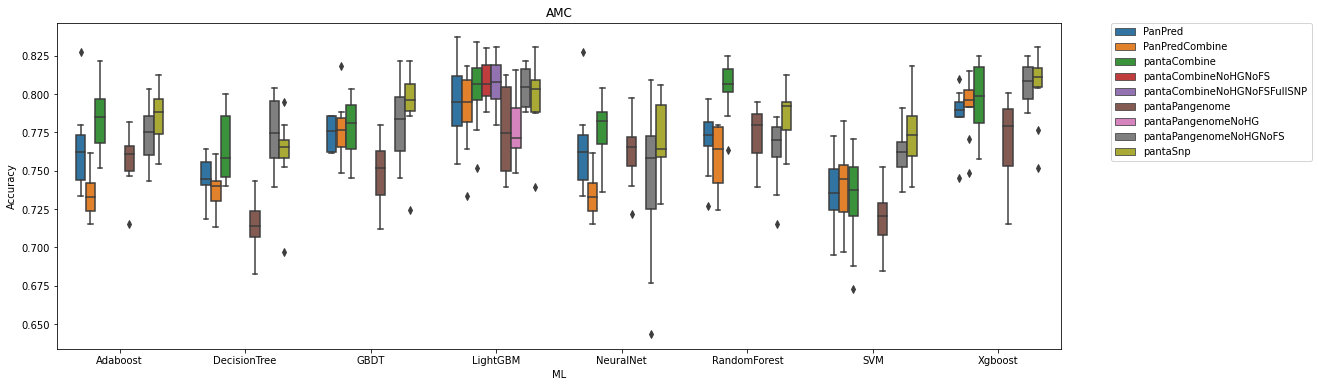

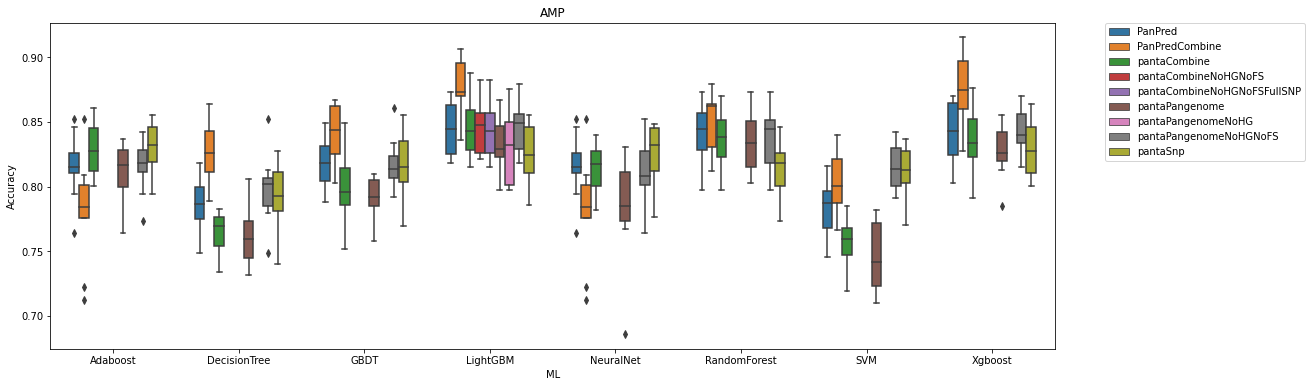

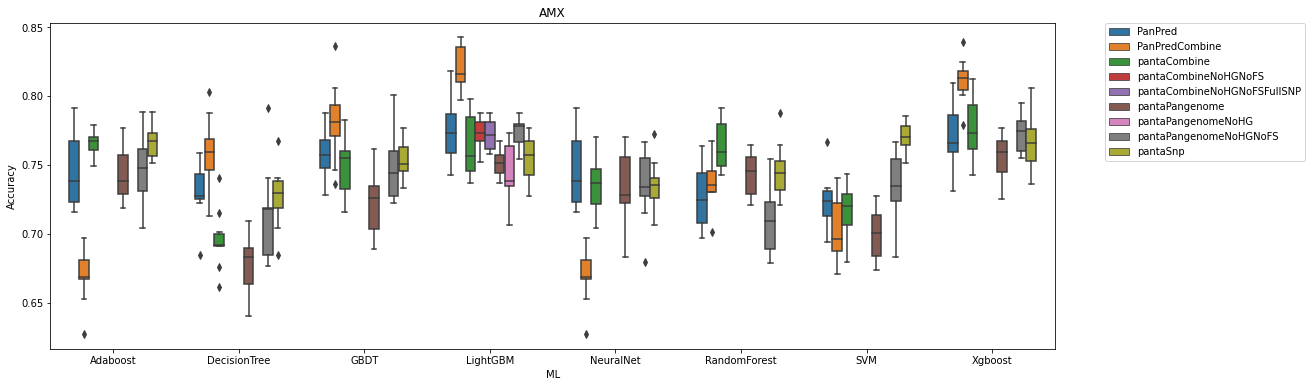

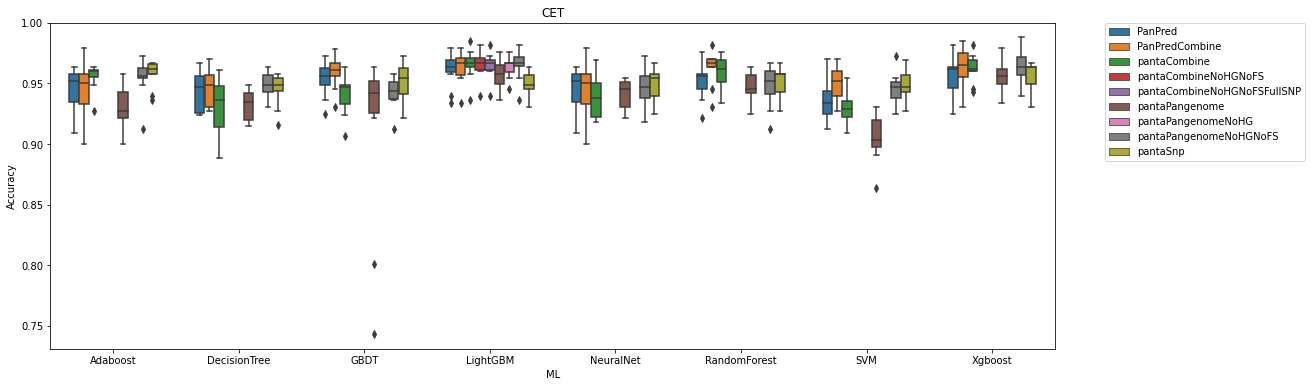

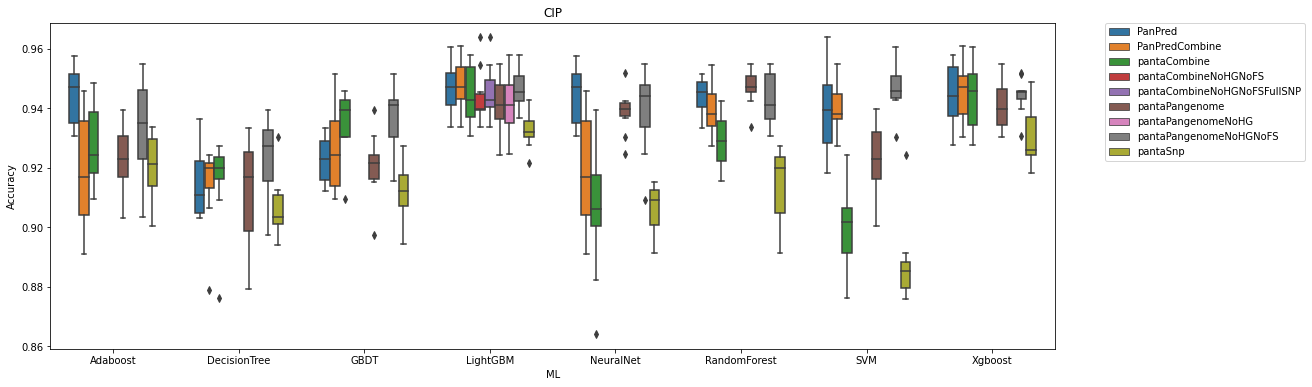

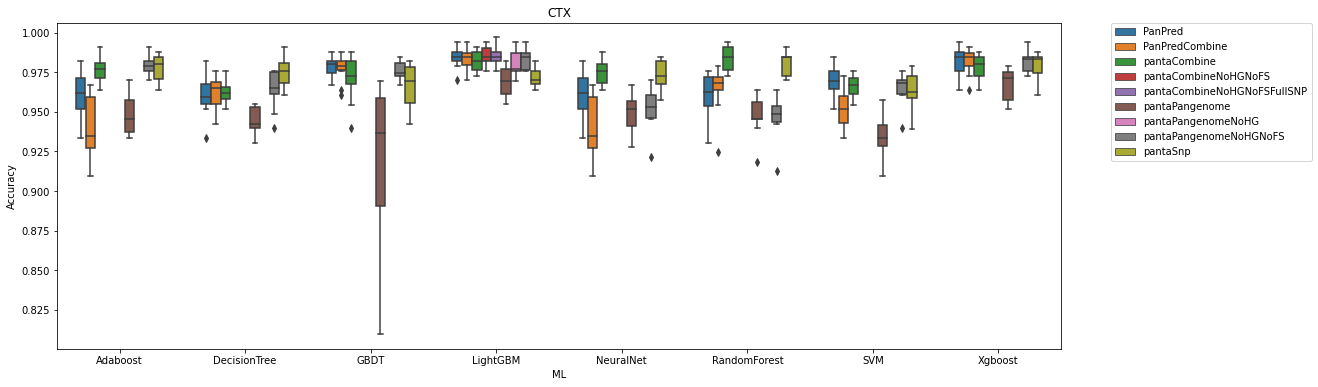

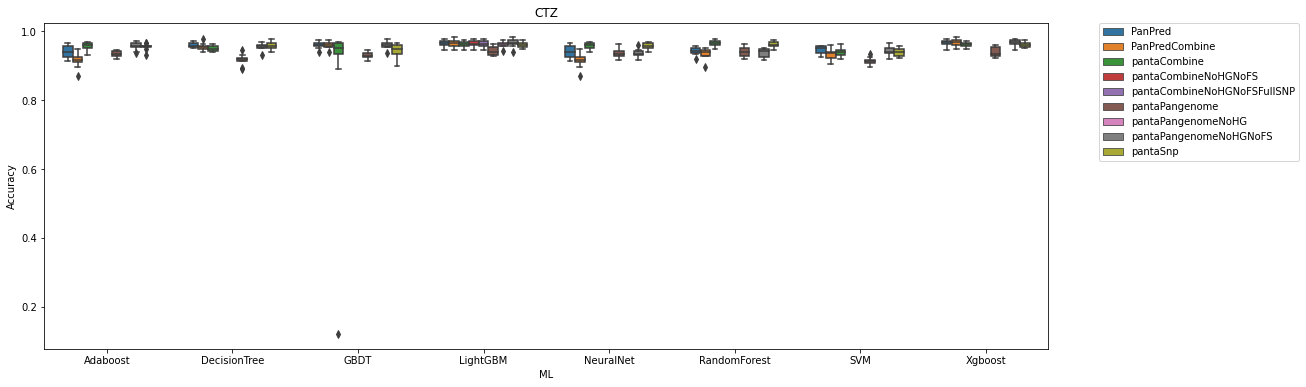

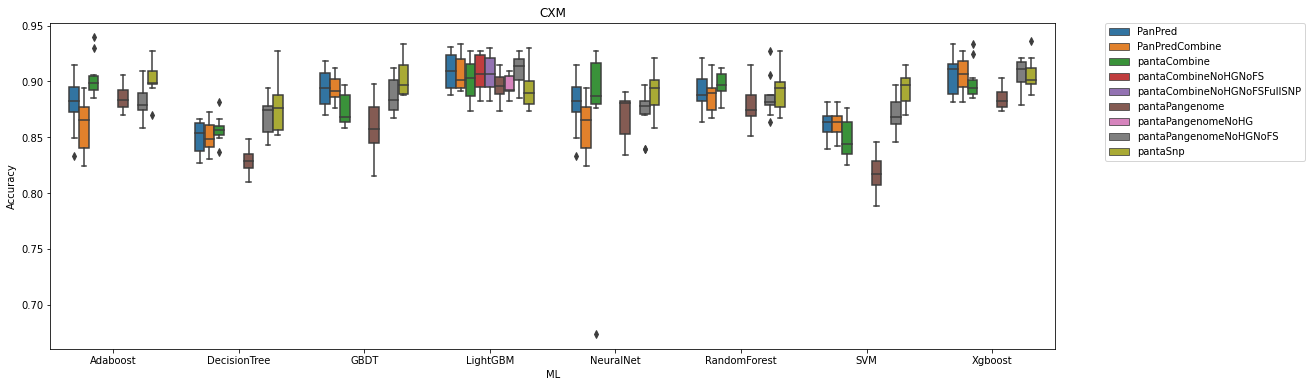

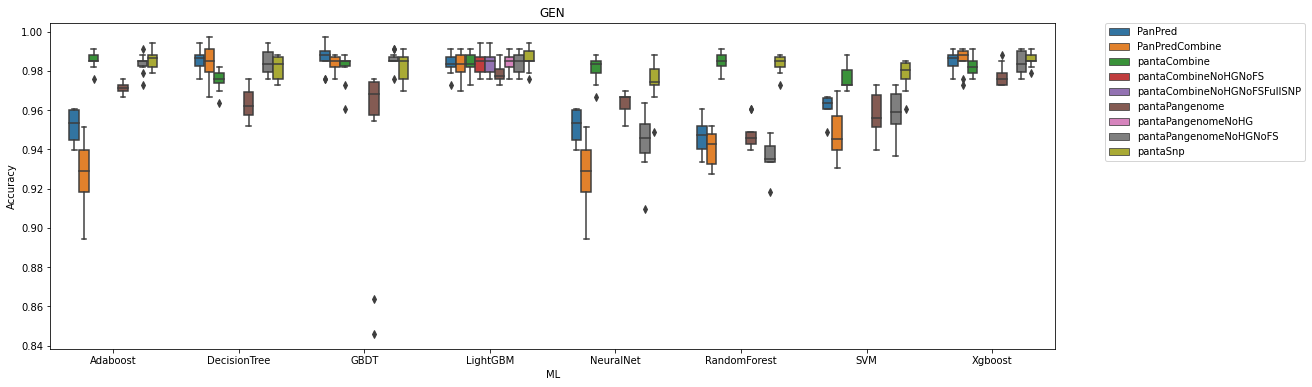

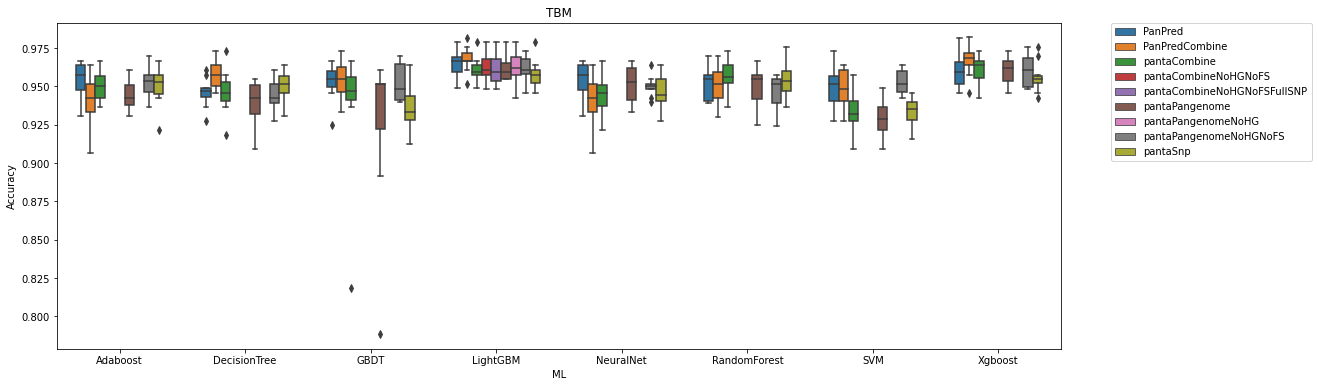

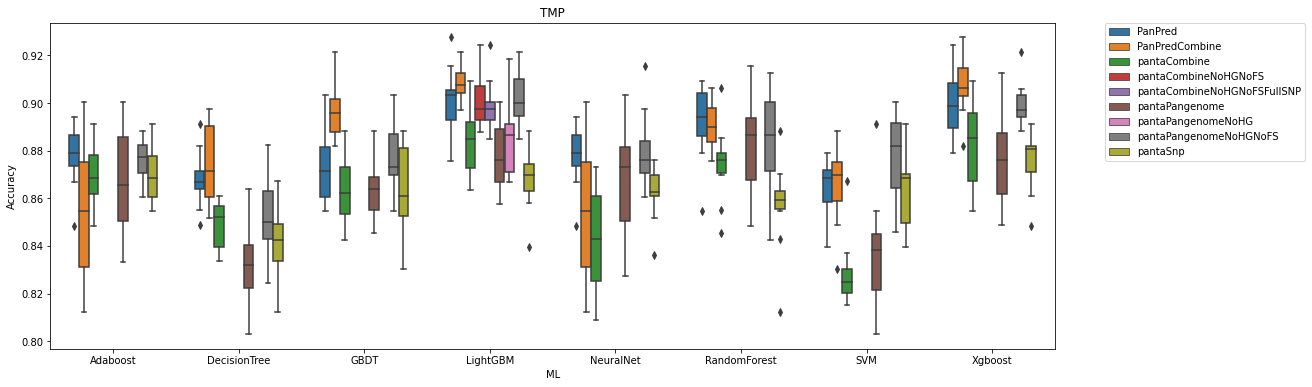

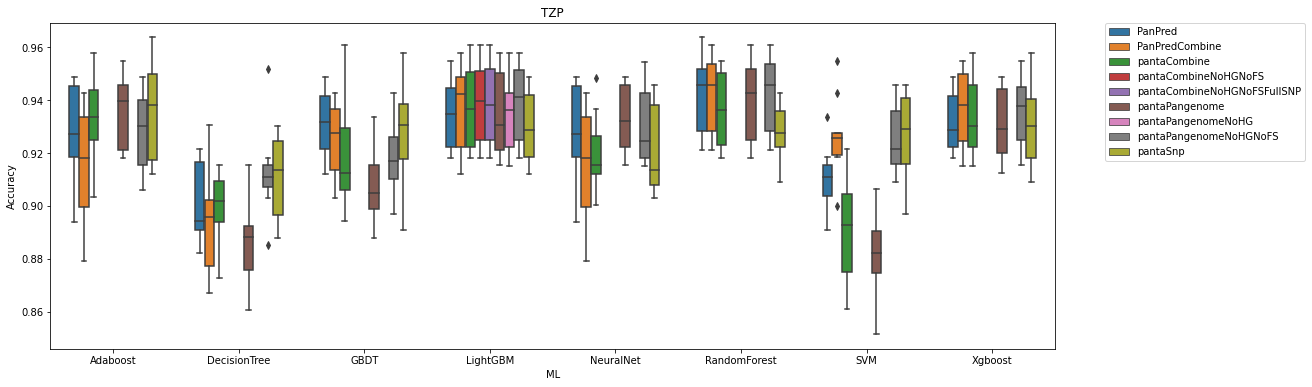

In [13]:
for amr in amr_list:
    df_subset = df[df["AMR"] == amr]
    # create grouped boxplot 
    plt.figure(figsize=(18,6))
    sns.boxplot(x = df_subset['ML'],
                # y = df_subset['F1_score'],
                y = df_subset['Accuracy'],
                hue = df_subset['Method'], width=0.7, order = ML_list, hue_order = method_list).set(title=amr)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [14]:
df_pan = df.loc[df['Method'].isin(['PanPred', 'pantaPangenome', 'pantaPangenomeNoHG', 'pantaPangenomeNoHGNoFS'])]

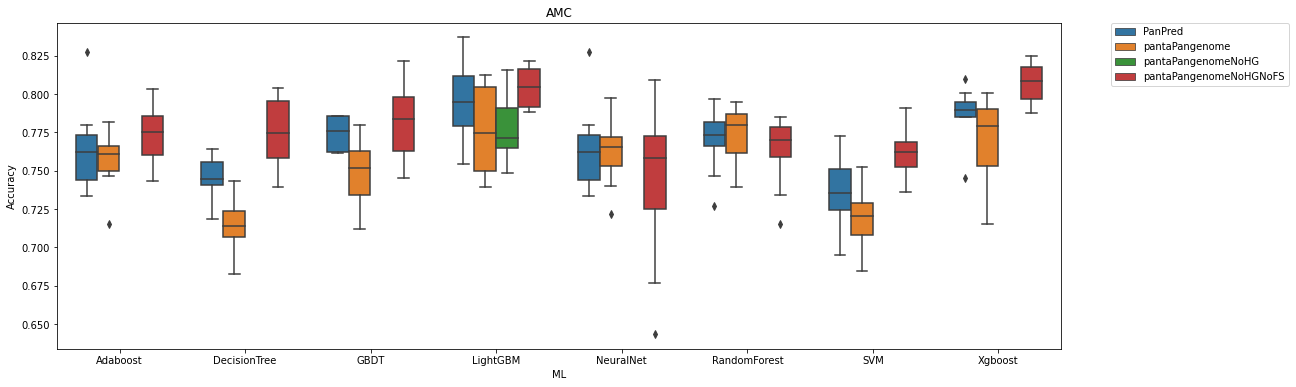

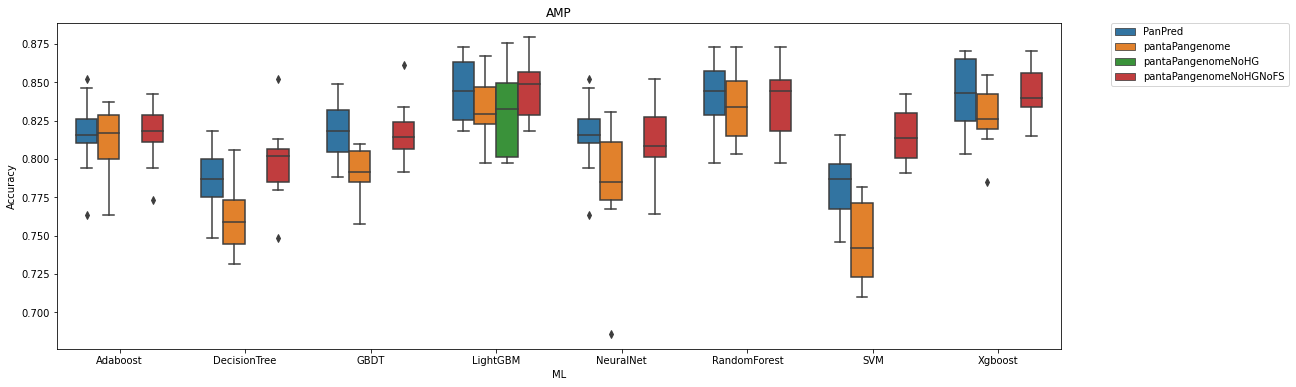

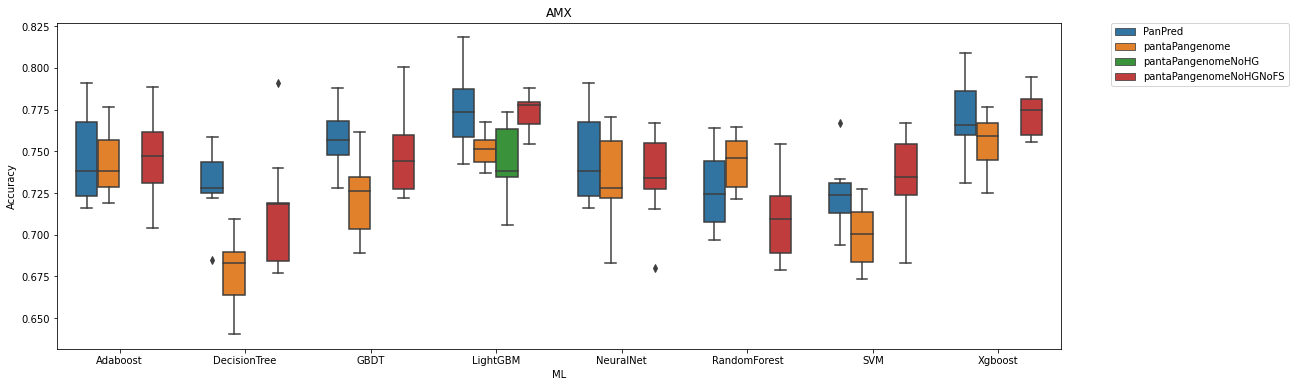

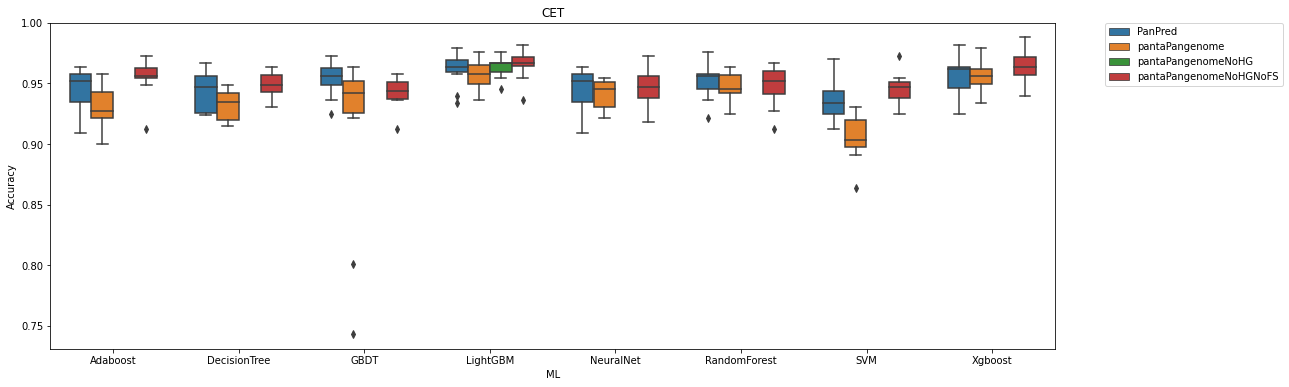

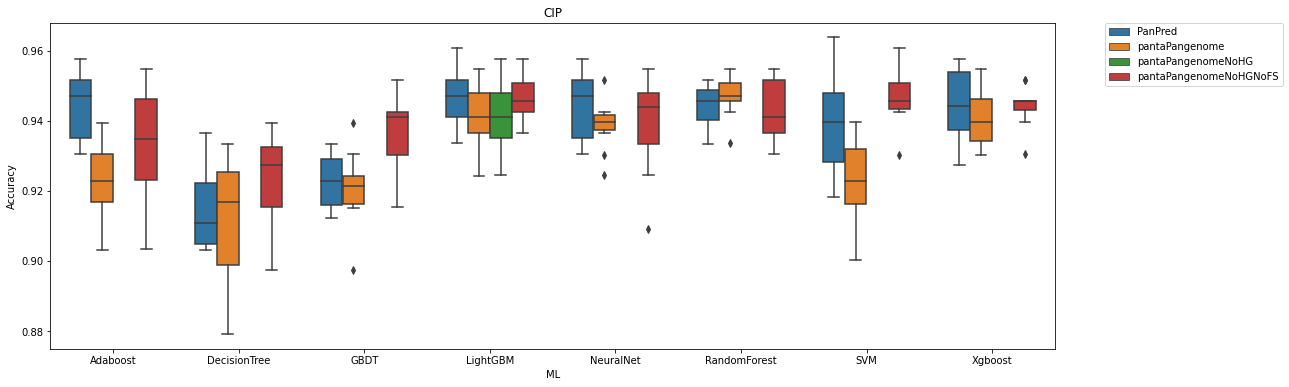

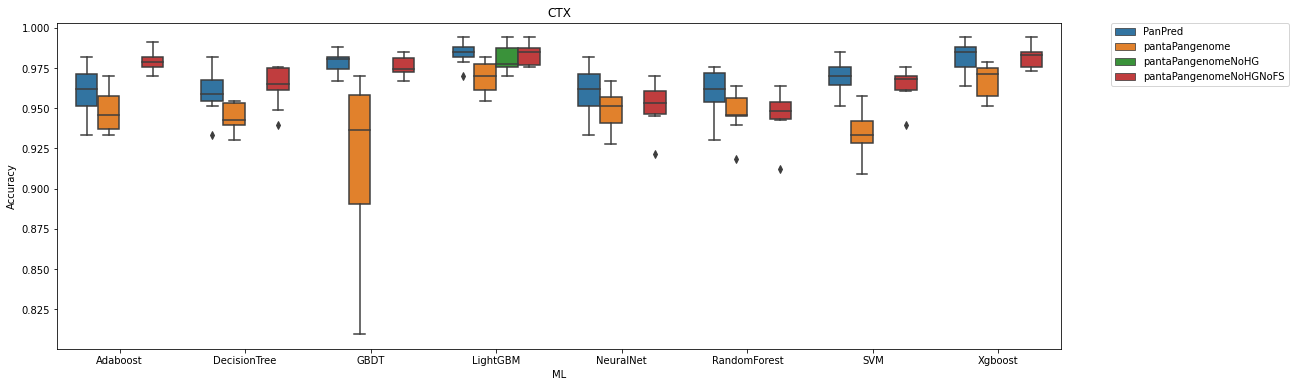

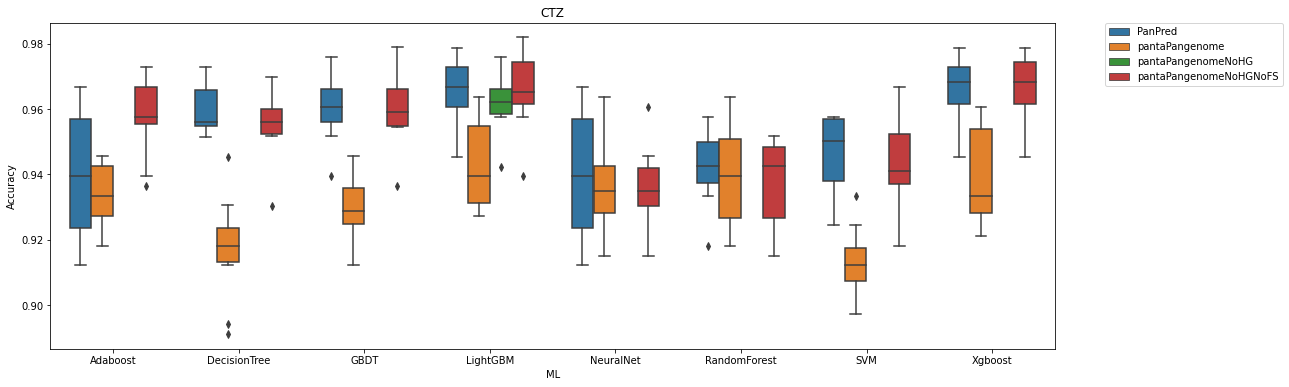

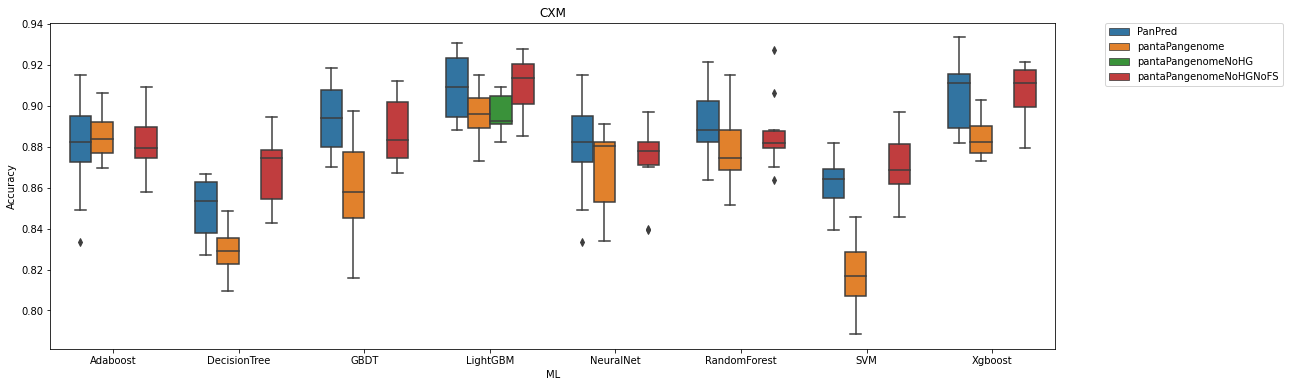

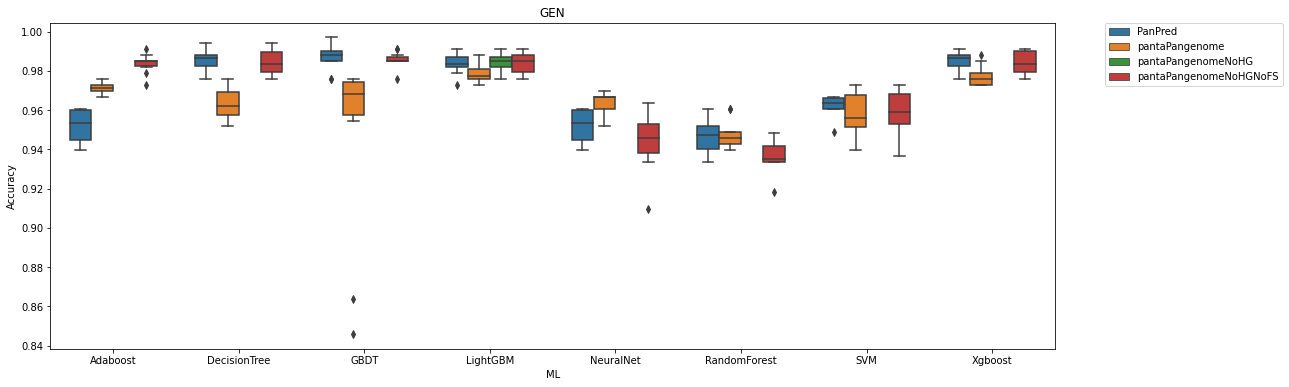

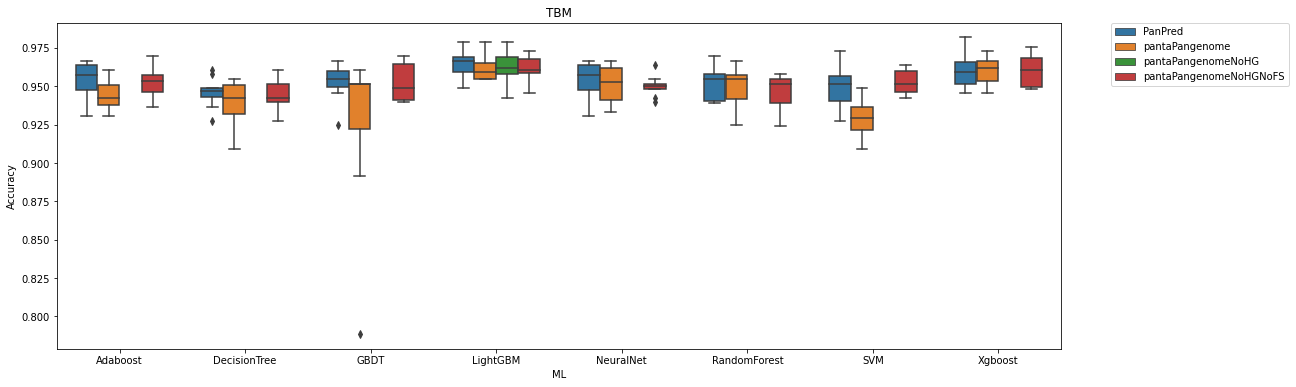

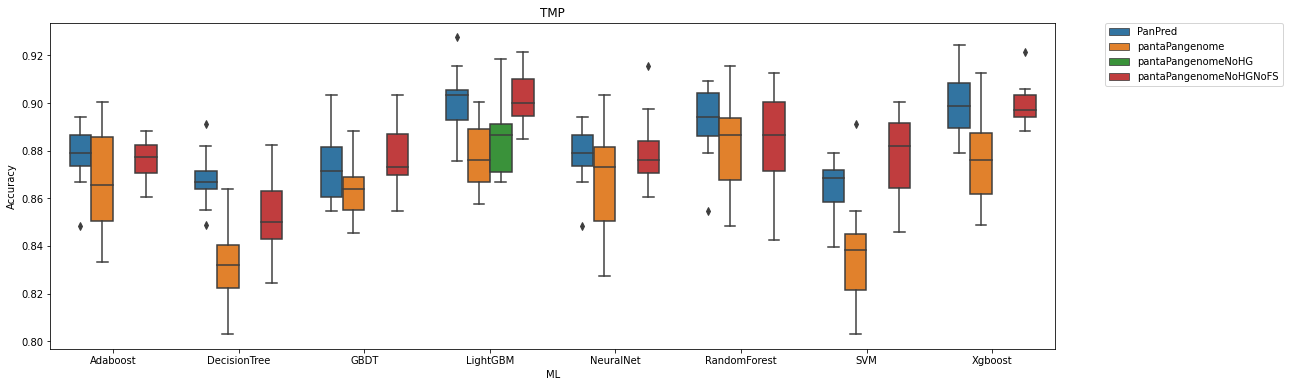

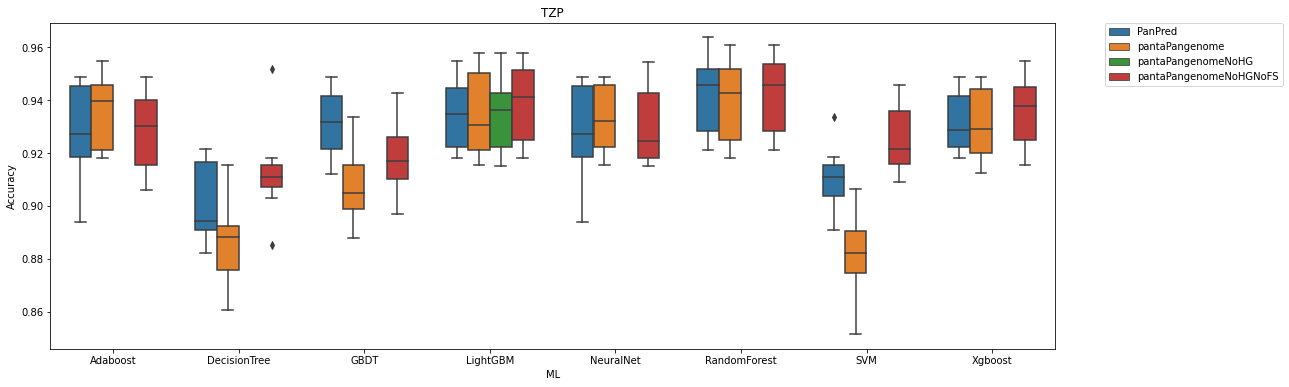

In [15]:
method_list = np.unique(df_pan['Method'])
for amr in amr_list:
    df_subset = df_pan[df_pan["AMR"] == amr]
    # create grouped boxplot 
    plt.figure(figsize=(18,6))
    sns.boxplot(x = df_subset['ML'],
                # y = df_subset['F1_score'],
                y = df_subset['Accuracy'],
                hue = df_subset['Method'], width=0.7, order = ML_list, hue_order = method_list).set(title=amr)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [16]:
df_panta = df.loc[df['Method'].isin(['pantaCombine', 'pantaCombineNoHGNoFSFullSNP', 'pantaPangenome', 'pantaSnp', 'pantaPangenomeNoHGNoFS'])]

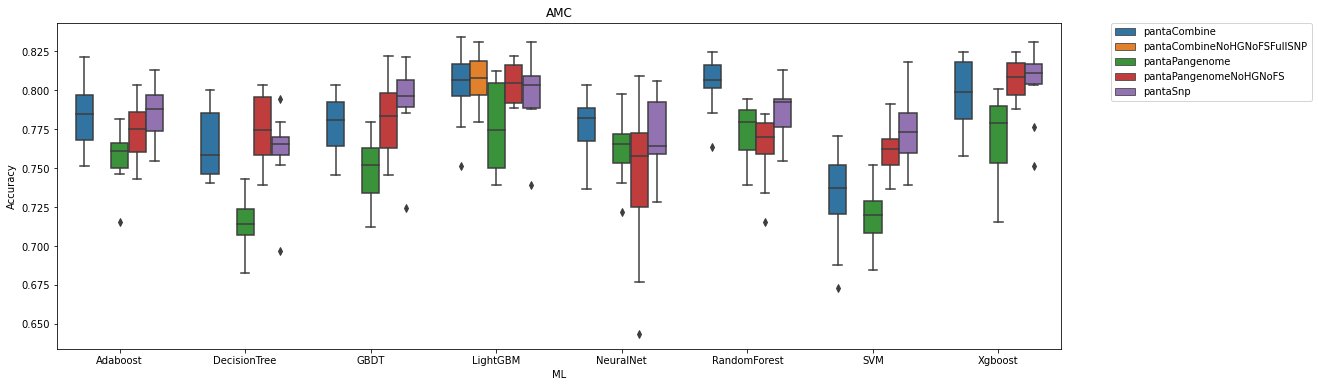

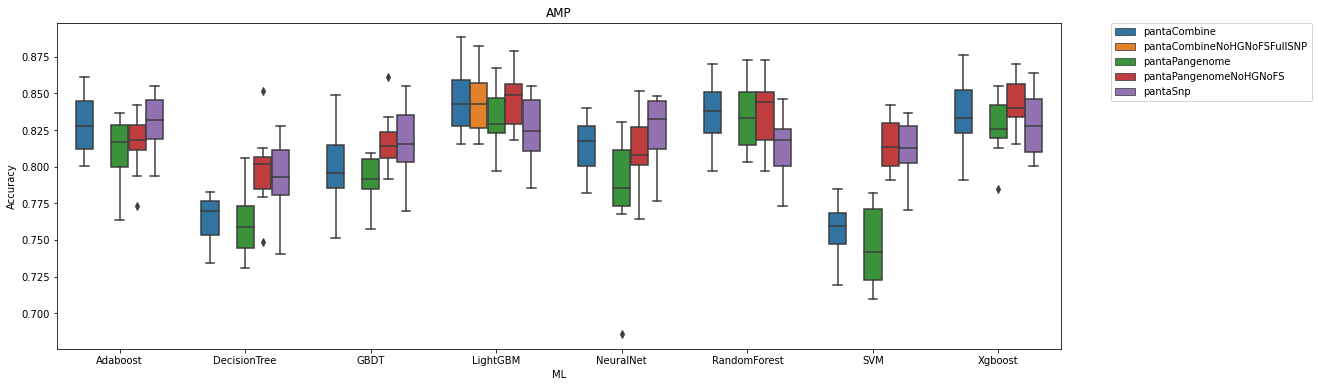

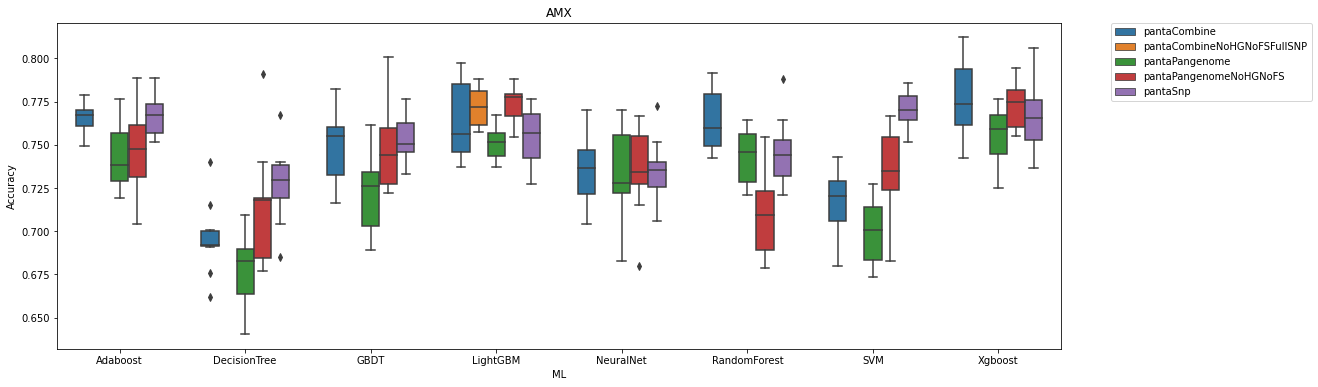

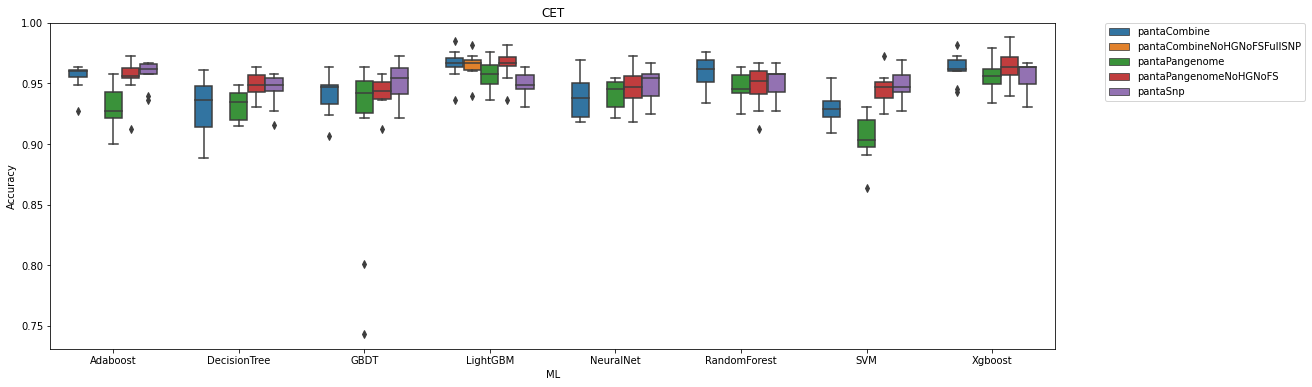

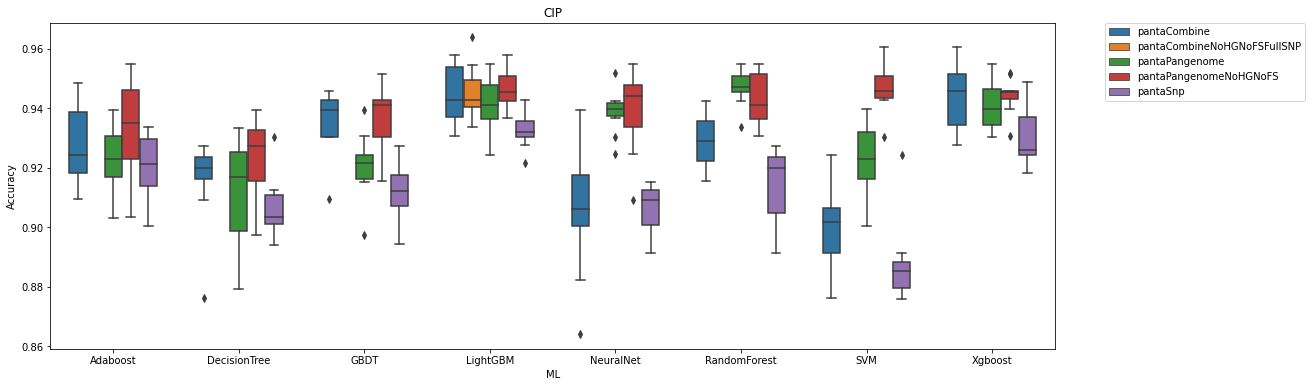

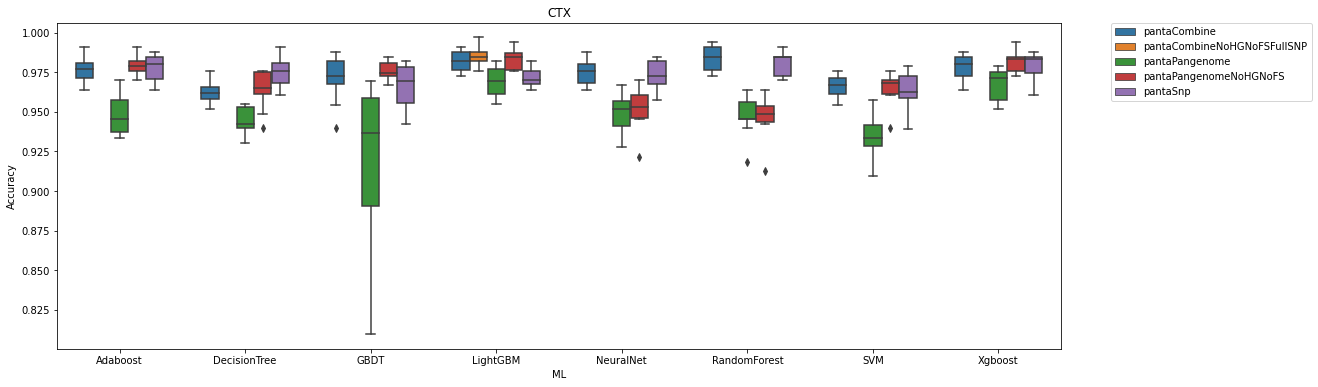

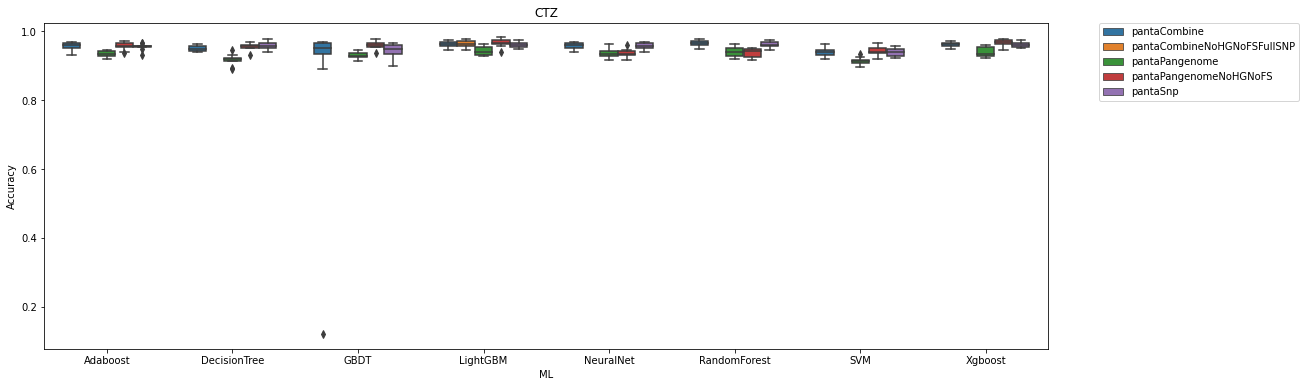

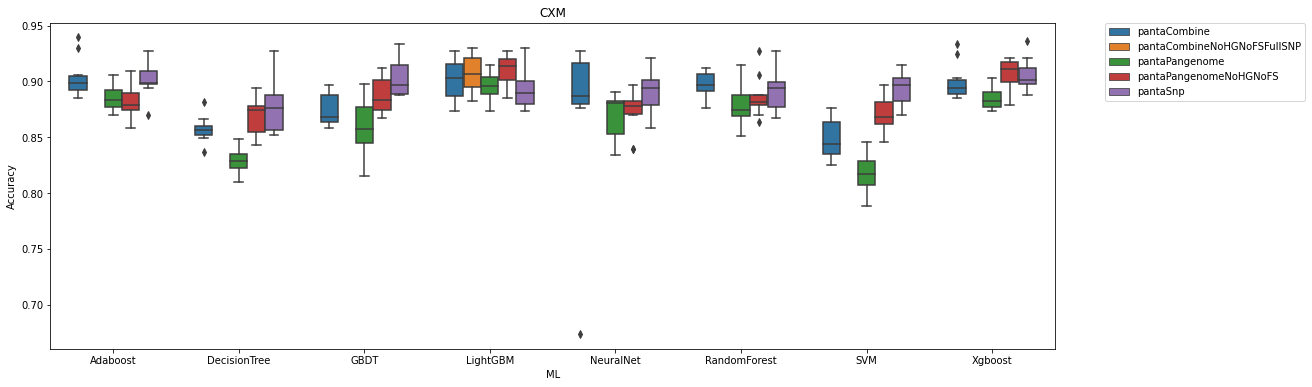

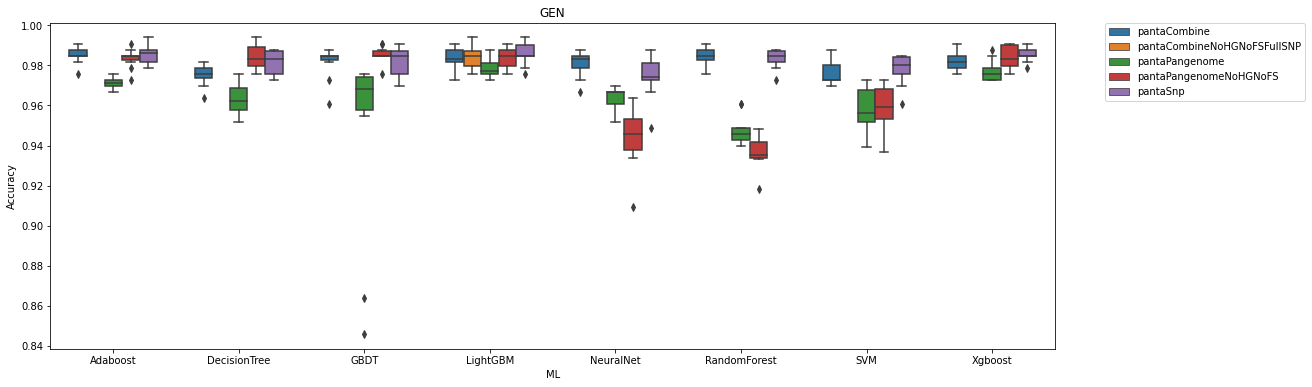

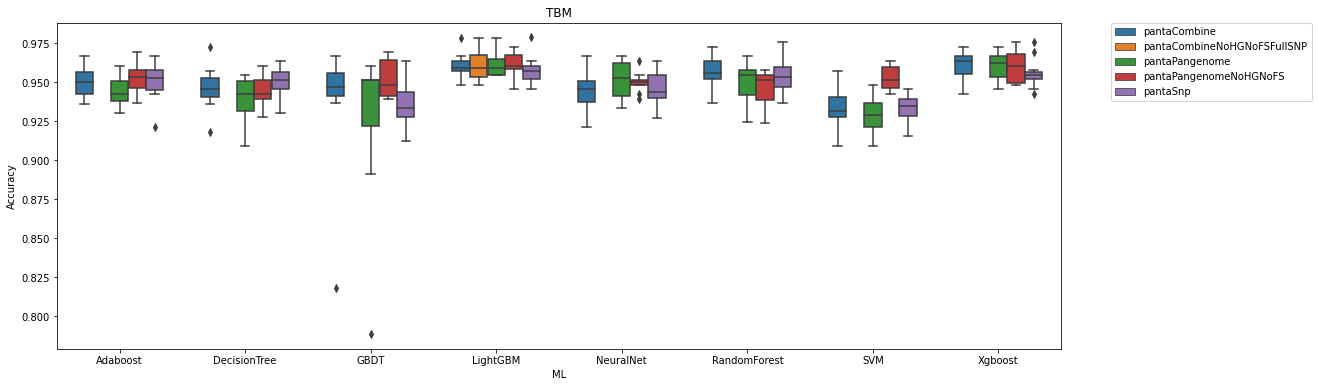

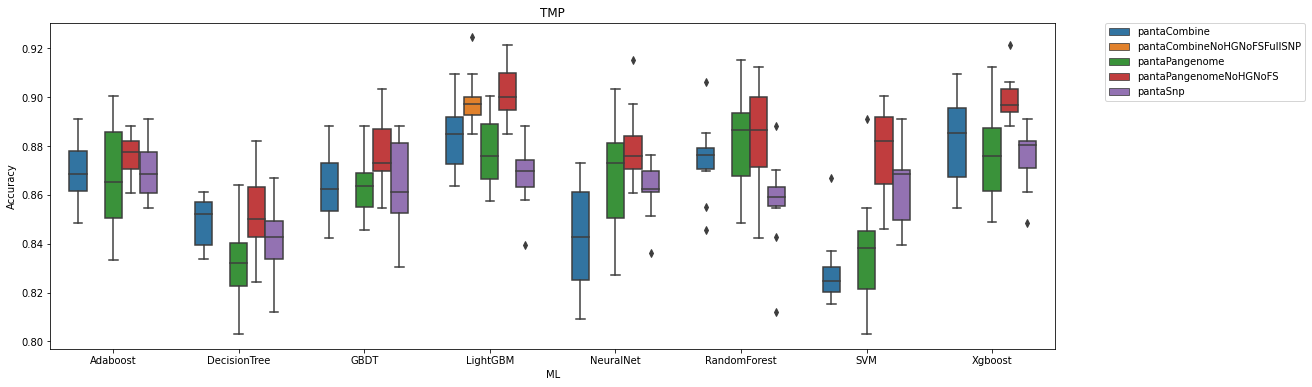

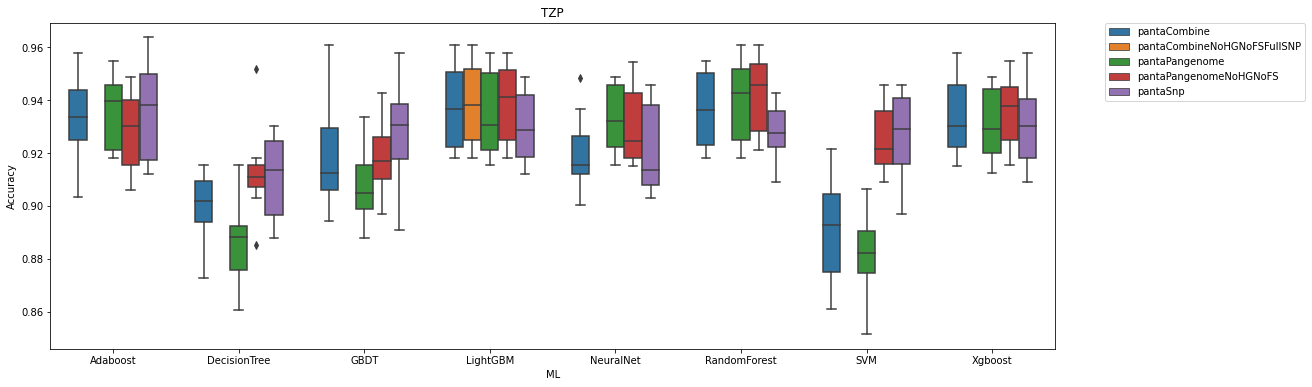

In [17]:
method_list = np.unique(df_panta['Method'])
for amr in amr_list:
    df_subset = df_panta[df_panta["AMR"] == amr]
    # create grouped boxplot 
    plt.figure(figsize=(18,6))
    sns.boxplot(x = df_subset['ML'],
                # y = df_subset['F1_score'],
                y = df_subset['Accuracy'],
                hue = df_subset['Method'], width=0.7, order = ML_list, hue_order = method_list).set(title=amr)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)